# AIR QUALITY PREDICTION USING RIDGE AND LASSO REGRESSION

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Decision Tree Regression and also comparison between previous model Linear Regression and lasso and ridge regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

Lets import required libraries to the project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file

In [3]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [4]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

Lets Check the dataset have null values or not uisng heatmap

<AxesSubplot:>

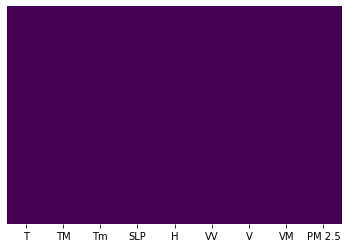

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

As we seen here PM 2.5 has one null values lets drop the one column beacause one values of drop will not effect to the model...

In [8]:
df = df.dropna()

In [9]:
X = df.iloc[:,:-1]  ##Independent Features, 
#In this we just drop the last feature and consider reamaining features as 
#independent features

Y = df.iloc[:,-1] ##Dependent Features,
##In this we just drop all the feature instaead last features
#for dependent features

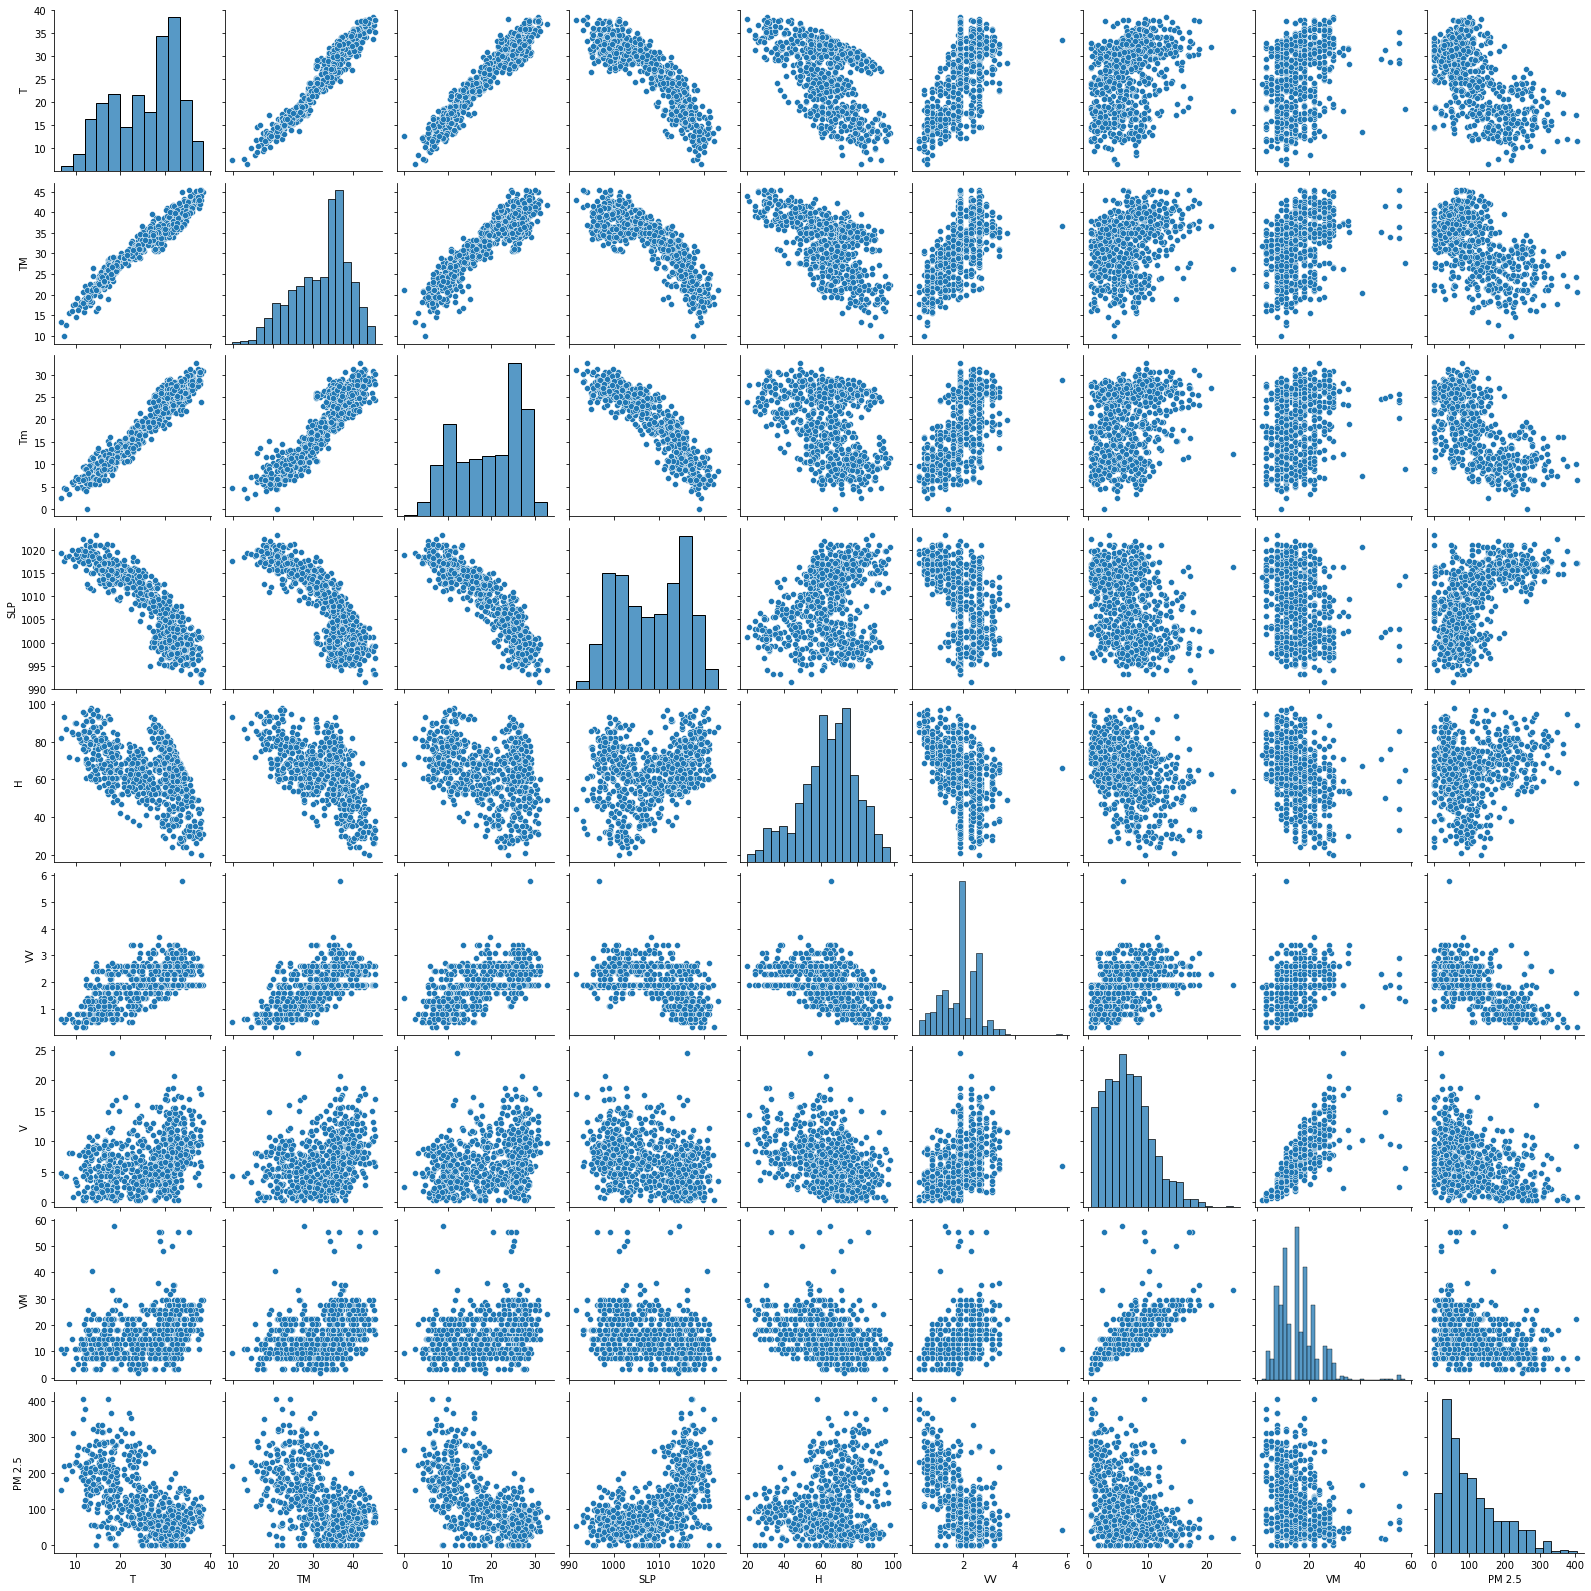

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [12]:
#Lets get Correlations of each features in dataset
corrmat = df.corr()

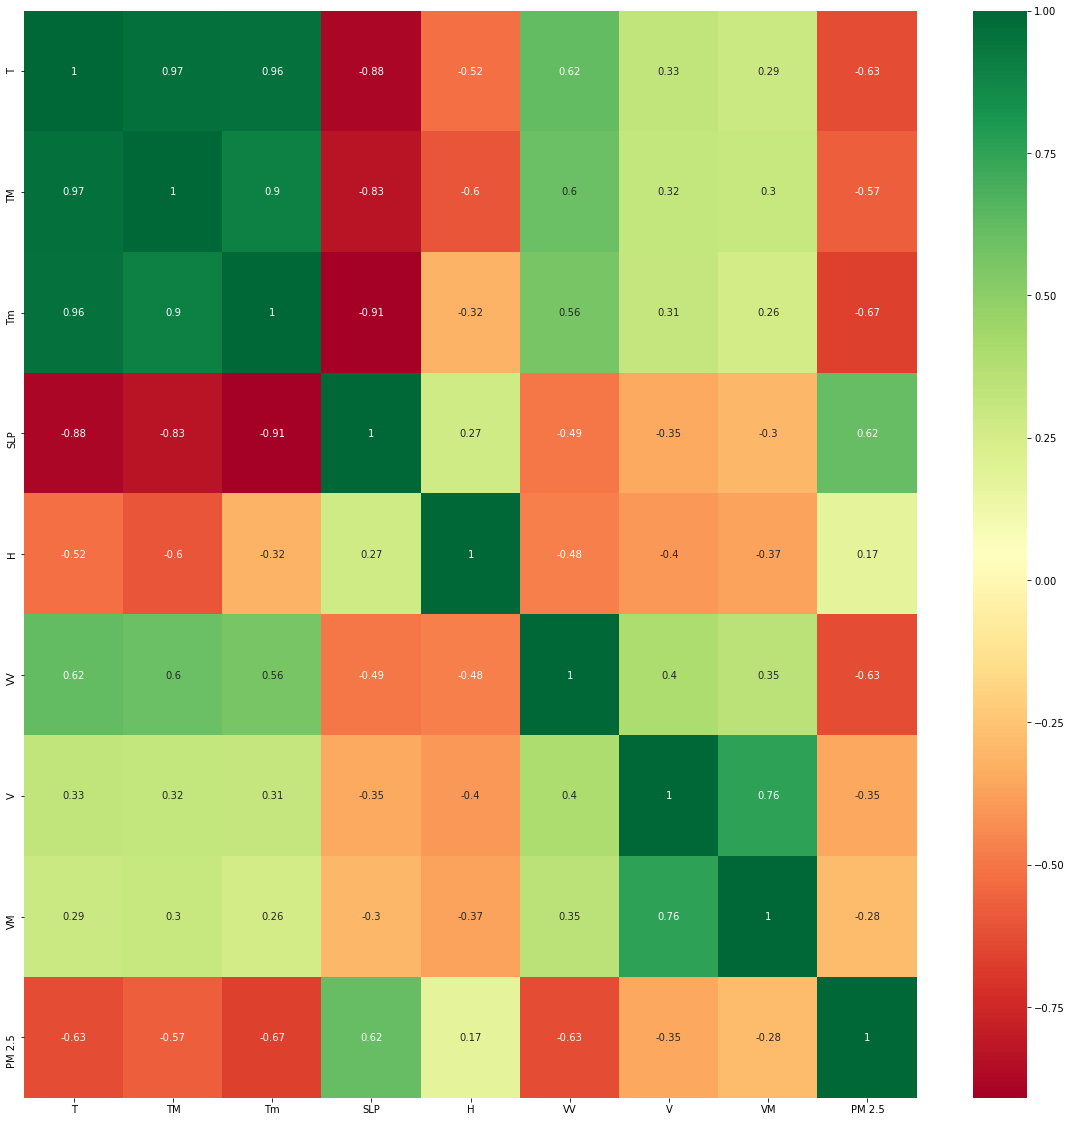

In [13]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)




ExtraTreesRegressor()

In [15]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

Lets Check the which features have more values using ensemble techniques of Feature selection

In [16]:
print(model.feature_importances_)

[0.13144332 0.10076707 0.20875803 0.11029496 0.08259929 0.27170664
 0.05544991 0.03898077]


Lets visualize the data with top 5 features and top 5 features will aply to the model

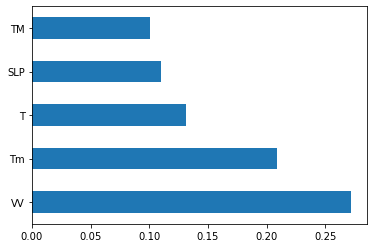

In [17]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In first we apply the machine learning lets just see for the referebce comparison

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

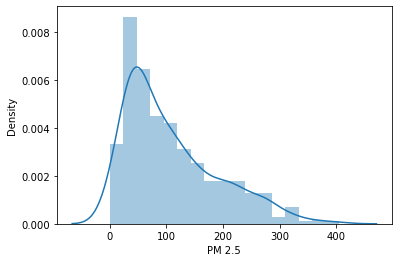

In [18]:
sns.distplot(Y)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dtree=DecisionTreeRegressor(criterion='mse')

In [23]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [28]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.36625065609593355


It looks like Overfitting because for training data it showing low bias result but for test data it showing high variances

Lets check cross validation score

In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,Y,cv=5)

In [30]:
score.mean()

0.053571967861571056

## Model Evaluation

In [33]:
prediction = dtree.predict(X_test)

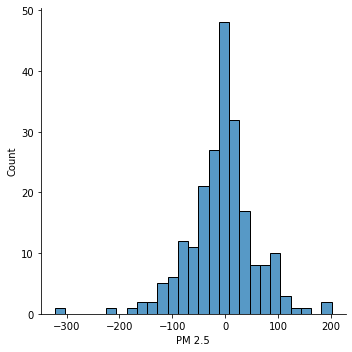

In [36]:
sns.displot(Y_test - prediction)

In [38]:
plt.scatter(Y_test,prediction)

## Hyperparameter Tuning DEcision Tree Regressor

In [39]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [40]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [41]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [42]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [43]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [45]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 5 minutes and 0.28 seconds.


Finding which parameter is best

In [46]:
random_search.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [47]:
random_search.best_score_

-3154.3114109858298

In [48]:
predictions=random_search.predict(X_test)

In [58]:
sns.distplot(Y_test-predictions)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 42.947622352792216
MSE: 3673.3793121140693
RMSE: 60.608409582450435


Ops The decision tree bad than Lasso and Ridge 